## 2.1) Design and Implementation Choices of your Model

## - For the following two sections, there were several models that i worked with to improve accuracy on the actual test dataset provided. Eventually the "Inception V4" model worked the best in my situation.
## - In the following few parts, i will show the buildup to this model, starting from very simple CNN models.

### - Now in the following few sections, the basic pre-processing techniques, type of CNN architectures utilized will be discussed 

### Part 1) Pre-processing techniques:-
#### - As we know that, before begaining the process of classification, it is always essential to pre-process the model. This makes the compuations faster.
#### - Since the data chosen is a greyscale image data, which means that dividing the entire training, validation and actual testing data by 255, brings all the data between the range of 0 to 1. 
#### - Once, the testing data was bought on scale, the labels of the data "y_train" data were "One-hot encoded". The one hot encoding binarizes all the labels, making it easier for the model to work upon.
### Part 2) Obataining the best CNN, Deep Neural networks based models:-
### In, this section, i will begin with a simplistic CNN model, and work my way upto the "Inception -V4" model. 
### Part 2A) CNN based approach :-
#### - There were several models i had looked into, before proceding. The one model that worked the best was, the one with 4 convultional layers, followed by 2 fully connected networks and an output network .
#### - There were several techniques such as "max-pooling" and "dropout" carried out throughout this arhitecture, inorder to prevent overfitting of the model. 
#### - In addition to this, "batch-normalization" has been carried out on the provided dataset inorder to standardize the inputs provided to the the several layers of the model in mini batches.
#### - The entire algorithm, alongwith the several pre-processing and post-processing methods can be accessed from learn. 
#### - The following few lines of code will give a glimpse of the model's architecture:-

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
    
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

### Part 2B) The AlexNet based approach :-
#### - "Alexnet" is one of the famous Convulutional neural networks model, which came to be be known after it won the imagenet competition. It achieved a top-5 error of 15.3% (Krizhevsky, Alex et al.,2012)
#### - This model is widely popular in the Deep learning platform, as it gives relatively good amount of accuracy on the actual test dataset.
#### - All this was achieved with 5 convulutional layers and 3 densly connected networks, followed by an output network, it is the next best model over the CNN model  that was developed in part2A . 
#### - In addition to these extra set of layers, Alexnet has completly different sized networks. Starting from the input, the size of the input network is almost thrice the size of the previous model presented.
#### - Likewise, the size of the initial few fully connected layers in the case of Alexnet, are Eight times the size of the previous model.
#### - The total number of parameters involved in this approach is about 62 million. 
#### - Just as the last architecture, there are several "max-pooling" and "droput" modules used inorder to prevent overfitting of the model. 
#### - This architecture provided a better accuracy on the actual test dataset, over the previous architecture.
##### - Reference :Krizhevsky, Alex et al. “ImageNet Classification with Deep Convolutional Neural Networks.” NIPS (2012).
#### - The entire algorithm, alongwith the several pre-processing and Data Augmentation methods can be accessed from learn. 
#### - The Alexnet architecture can be seen below :-

In [ ]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(28,28,1), kernel_size=(11,11), strides=(4,4), padding= 'same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(28,28,1), activation='relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096, activation='relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000, activation='relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(5, activation='softmax'))

### Part 2C) Inception based architecture :-
#### - So in this section, few of the inception based models will be utilized to achieve good amount accuracy on the test dataset.
#### - This network in network arcitecture has been used heavily in the recent times to achieve a very substatial amount of accuracy on new unseen data (Szegedy, et al. 2016).
#### - There are several inception models, that have been developed over the years, starting from inception V1-V4 , and the hybrid versions inception-resnet V1-V2.
#### - All of these arcitectures have several components such as the "Stem" branch, several variations of the "inception" branches ( varies depending on the model), and some recent models have the "reduction" branch in addition to the rest.
#### - On doing a bit of paper review(Szegedy, et al. 2016), i found out that the latest models "Inception V4" and "Inception-Resnet V2" give the best performance.
#### - So in my analysis, i have opted for the "Inception V4" model, as it provides similar performance to the hybrid model "Inception-Resnet V2".
#### - As mentioned in (Szegedy, et al. 2016), that  the Inception architecture is very flexible, meaning that there are a lot of possible changes to the number of filters in the various layers that do not affect the quality of the fully trained network.
#### - Keeping the above notion in mind, i will be utilizing various range of filters and will also try using only certain blocks, out of the many inception blocks used in the actual "inception V4" architecture, and try producing the best possible model with a few certain additional post processing methods.
#### - Based on the paper (Szegedy, et al. 2016), I have opted for the "Inception A", "Inception B" and "Reduction A" modules only. 
#### - *Reference -  Szegedy, Christian et al. “Inception-v4, Inception-ResNet and the Impact of Residual Connections on Learning.” AAAI (2016).
#### - The architecture of these modules can be seen below and the entire model will be explained block-wise in section 2.2. 

In [ ]:
# Inception module A, as depicted in  (Szegedy, et al. 2016)
def inception_module_A(x, filters=None, kernel_initializer='glorot_uniform'):
    
    if filters is None:
        filters = int(x.shape[-1])
    branch_filters = filters // 4
        
    b1 = conv2D_bn_relu(x, filters=(branch_filters // 3) * 2, kernel_size=1, strides=1, kernel_initializer=kernel_initializer)
    b1 = conv2D_bn_relu(b1,filters=branch_filters, kernel_size=3,strides=1, padding='same', kernel_initializer=kernel_initializer)
    
    b2 = conv2D_bn_relu(x, filters=(branch_filters // 3) * 2, kernel_size=1, strides=1, kernel_initializer=kernel_initializer)
    b2 = conv2D_bn_relu(b2, filters=branch_filters, kernel_size=3, strides=1, padding='same',kernel_initializer=kernel_initializer)
    b2 = conv2D_bn_relu(b2, filters=branch_filters, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer)
        
    b3 = conv2D_bn_relu(x, filters=branch_filters, kernel_size=1, strides=1, kernel_initializer=kernel_initializer)
    
    pool = layers.AveragePooling2D(pool_size=(3, 3), strides=1, padding='same')(x)
    pool = conv2D_bn_relu(pool, filters=branch_filters, kernel_size=1, strides=1,kernel_initializer=kernel_initializer)

    return layers.concatenate([b1, b2, b3, pool])

# Inception module C, as depicted in  (Szegedy, et al. 2016)
def inception_module_C(x, filters=None, kernel_initializer='glorot_uniform'):
    if filters is None:
        filters = int(x.shape[-1])
    branch_filters = filters // 6
        
    b1 = conv2D_bn_relu(x, filters=(branch_filters // 2) * 3, kernel_size=1, strides=1, kernel_initializer=kernel_initializer)
        
    b1a = conv2D_bn_relu(b1, filters=branch_filters, kernel_size=(1, 3), strides=1, padding='same', kernel_initializer=kernel_initializer)
    
    b1b = conv2D_bn_relu(b1, filters=branch_filters, kernel_size=(3, 1), strides=1, padding='same', kernel_initializer=kernel_initializer)
    
    b2 = conv2D_bn_relu(x, filters=(branch_filters // 2) * 3, kernel_size=1, strides=1,kernel_initializer=kernel_initializer)
    b2 = conv2D_bn_relu(b2, filters=(branch_filters // 4) * 7, kernel_size=(1, 3), strides=1, padding='same', kernel_initializer=kernel_initializer)
    b2 = conv2D_bn_relu(b2, filters=branch_filters * 2, kernel_size=(3, 1), strides=1, padding='same', kernel_initializer=kernel_initializer)

    b2a = conv2D_bn_relu(b2, filters=branch_filters,  kernel_size=(1, 3), strides=1, padding='same',kernel_initializer=kernel_initializer)
    
    b2b = conv2D_bn_relu(b2, branch_filters, kernel_size=(3, 1), strides=1, padding='same', kernel_initializer=kernel_initializer)
        
    b3 = conv2D_bn_relu(x, filters=branch_filters, kernel_size=1, strides=1, kernel_initializer=kernel_initializer)
    
    pool = layers.AveragePooling2D(pool_size=(3, 3), strides=1, padding='same')(x)
    pool = conv2D_bn_relu(pool, filters=branch_filters, kernel_size=1, strides=1, kernel_initializer=kernel_initializer)
    
    return layers.concatenate([b1a, b1b, b2a, b2b, b3, pool])

# Reduction module C, as depicted in  (Szegedy, et al. 2016)
def reduction_module_A(x, filters, kernel_initializer='glorot_uniform'):
    
    branch_filters = (filters - int(x.shape[-1])) // 2
        
    b1 = conv2D_bn_relu(x, filters=branch_filters, kernel_size=3, strides=2, padding='same',  kernel_initializer=kernel_initializer)
    
    b2 = conv2D_bn_relu(x, filters=(branch_filters // 3) * 2, kernel_size=1, strides=1, kernel_initializer=kernel_initializer)
    b2 = conv2D_bn_relu(b2, filters=(branch_filters // 6) * 5, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer)
    b2 = conv2D_bn_relu(b2, filters=branch_filters, kernel_size=3, strides=2, padding='same', kernel_initializer=kernel_initializer)
    
    pool = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    return layers.concatenate([b1, b2, pool])

stem_width = 128

# The inception V4 architecture being carried out :-
inputs = layers.Input(shape=(28,28,1))
x = conv2D_bn_relu(inputs,filters=stem_width,kernel_size=5,strides=1,padding='same',name='conv_1')

x = reduction_module_A(x, filters=int(2*stem_width))
x = layers.SpatialDropout2D(0.3)(x)

x = inception_module_A(x, filters=int(2*stem_width))
x = inception_module_A(x, filters=int(2*stem_width))

x = reduction_module_A(x, filters=int(3*stem_width))
x = layers.SpatialDropout2D(0.5)(x)

x = inception_module_C(x, filters=int(3*stem_width))
x = inception_module_C(x, filters=int(3*stem_width))
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(5, name='logits')(x)
x = layers.Activation('softmax', name='softmax')(x)

### Part 3) Best Model optimizer :-
#### - In addition to finding a good architecture, it is also essential to find the best form of optimizer for the model to tie together the loss function and model parameters by updating the model in response to the output of the loss function.
#### - Basically the loss function in a way guides the optimizer towards moving in the right direction, when it is moving towards the wrong.
#### - There were several types of optimizers utilized by me, such as the Stochastic Gradient descent (SGD) , the Adam and Adamax. The performance of each of these optimizers was in the order of Adamax > Adam> SGD.
#### - The reason why Adamax works the best in this scenario is it's infinite-order norm (as opposed to adam) that makes it suprisingly very stable. In other words, Adamax is just a variation of Adam which is less prone to over fitting (Kingma,2014).
#### - What makes Adamax much better, is when it is utilized with some learning rate annealing technique it starts providing real good results. More on this will be discussed in Part 4).
#### - *Reference- Kingma, Diederik & Ba, Jimmy. (2014). Adam: A Method for Stochastic Optimization. International Conference on Learning Representations.  

### Part 4) Best Learning rate annealing technique :-
#### - There are several Learning rate annealing techniques that have been developed over the years, but the one i opted for in this model was the "Cosine Annealing" technique, which is a fairly new technique developed in the year 2017 (Loshchilov & Hutter, 2017).
#### - The Speciality of this model is that it does a very thorough run-through the model's solution space by using warm restarts to break out of local minimums.
#### - The main idea is that, as the learning rate decreases, the model eventually becomes much more precise but with the possibility of getting stuck at a partcular state. Therefore, these warm restarts prevent the model from being stuck.
#### - I will be utilizing this technique in conjunction with the Adamax optimizer.
#### -*Reference- Loshchilov, Ilya and Frank Hutter. “SGDR: Stochastic Gradient Descent with Warm Restarts.” ICLR (2017).

### Part 5) Best Data Augmentation method :-
#### - Data Augmentation is one of the essential steps in Deep Machine learning, as it provides different variations of the same data, making the model more adaptable towards slight varitions in the same data.
#### - There are several ways of data augmentation, including, rotation of the images by a certain angle, the zoom range, the shear range, random flipping of images. In a way making the model much more robust.
#### - A special fucntion, known by the name "Elastic Deformation" function has been utilized in this scenario for better adaptibility [Simard2003].
#### - This function generates a coarse displacement grid with a random displacement for each grid point.
#### - In addition to the usual fucntions carried out by the data augmentation function, the Elastic Deformation function can backpropagate the gradient through the deformation. This makes it easier to integrate the deformation module into the the CNN. 
#### - *Reference - Simard, Steinkraus and Platt, "Best Practices forConvolutional Neural Networks applied to Visual Document Analysis", inProc. of the International Conference on Document Analysis andRecognition, 2003.
### Part 6) Label Smoothening :-
#### - As per (Szegedy, Christian & Vanhoucke et al. 2016), a mechanism to regularize the classifier layer has been proposed, by estimating the marginalized effect of label-dropout during training .
#### - This change in ground-truth label distribution can be reffered to as label-smoothing regularization, or LSR.
#### - The proposed mechanism encourages the model to be less confident. While this may not be desired if the goal is to maximize the log-likelihood of training labels, it does regularize the model and makes it more adaptable.
#### - *Reference -Szegedy, Christian & Vanhoucke, Vincent & Ioffe, Sergey & Shlens, Jon & Wojna, ZB. (2016). Rethinking the Inception Architecture for Computer Vision. 10.1109/CVPR.2016.308. 

## 2.3:  Implementation of your Design Choices
### - So in this section, i will be depicting important code blocks that will help understanding the code posted on learn much better :-
### Block 1 - ( Splitting the dataset provided into training and testing)

In [ ]:
data_f = pd.read_csv('../input/ece657a-w20-asg3-part2/train.csv')
test = pd.read_csv('../input/ece657a-w20-asg3-part2/testX.csv')

X = data_f.iloc[:,2:]
y = data_f.iloc[:,1]
final_test = test.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

#### - A split of 90% training and 10% testing data was carried out the provided fashion MNIST dataset, before predicting the accuracy of the model with the actual test dataset.
#### - The final test block represents the actual test dataset to be experimented on.
### Block 2 - ( Reshaping and Standardization of data) :-

In [ ]:
X_train = X_train.values.reshape((-1, 28, 28, 1))
X_test = X_test.values.reshape((-1, 28, 28, 1))
final_test = final_test.values.reshape((-1, 28, 28, 1))

X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
final_test = final_test.astype("float32")/255

y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

#### - The reshaping of the data is crucial, since we have images as 1D vectors = with each containing about 784 pixels. 
#### - Since the data chosen is a greyscale image data, which means that dividing the entire training, validation and actual testing data by 255, brings all the data between the range of 0 to 1.
#### - The labels are one-hot encoded, to make it easier for the model to work upon.
### Block 3 - ( The Inception V4 architechture, as depicted before) :-

In [ ]:
# Inception module A, as depicted in  (Szegedy, et al. 2016)
# x: 4D tensor with shape: `(batch, rows, cols, channels)`.
# filters: Number of output filters for the module.
# kernel_initializer: Weight initializer for all convolutional layers in module.

def inception_module_A(x, filters=None, kernel_initializer='glorot_uniform'):
    
    if filters is None:
        filters = int(x.shape[-1])
    branch_filters = filters // 4
        
    b1 = conv2D_bn_relu(x, filters=(branch_filters // 3) * 2, kernel_size=1, strides=1, kernel_initializer=kernel_initializer)
    b1 = conv2D_bn_relu(b1,filters=branch_filters, kernel_size=3,strides=1, padding='same', kernel_initializer=kernel_initializer)
    
    b2 = conv2D_bn_relu(x, filters=(branch_filters // 3) * 2, kernel_size=1, strides=1, kernel_initializer=kernel_initializer)
    b2 = conv2D_bn_relu(b2, filters=branch_filters, kernel_size=3, strides=1, padding='same',kernel_initializer=kernel_initializer)
    b2 = conv2D_bn_relu(b2, filters=branch_filters, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer)
        
    b3 = conv2D_bn_relu(x, filters=branch_filters, kernel_size=1, strides=1, kernel_initializer=kernel_initializer)
    
    pool = layers.AveragePooling2D(pool_size=(3, 3), strides=1, padding='same')(x)
    pool = conv2D_bn_relu(pool, filters=branch_filters, kernel_size=1, strides=1,kernel_initializer=kernel_initializer)

    return layers.concatenate([b1, b2, b3, pool])

# Inception module C, as depicted in  (Szegedy, et al. 2016)
def inception_module_C(x, filters=None, kernel_initializer='glorot_uniform'):
    if filters is None:
        filters = int(x.shape[-1])
    branch_filters = filters // 6
        
    b1 = conv2D_bn_relu(x, filters=(branch_filters // 2) * 3, kernel_size=1, strides=1, kernel_initializer=kernel_initializer)
        
    b1a = conv2D_bn_relu(b1, filters=branch_filters, kernel_size=(1, 3), strides=1, padding='same', kernel_initializer=kernel_initializer)
    
    b1b = conv2D_bn_relu(b1, filters=branch_filters, kernel_size=(3, 1), strides=1, padding='same', kernel_initializer=kernel_initializer)
    
    b2 = conv2D_bn_relu(x, filters=(branch_filters // 2) * 3, kernel_size=1, strides=1,kernel_initializer=kernel_initializer)
    b2 = conv2D_bn_relu(b2, filters=(branch_filters // 4) * 7, kernel_size=(1, 3), strides=1, padding='same', kernel_initializer=kernel_initializer)
    b2 = conv2D_bn_relu(b2, filters=branch_filters * 2, kernel_size=(3, 1), strides=1, padding='same', kernel_initializer=kernel_initializer)

    b2a = conv2D_bn_relu(b2, filters=branch_filters,  kernel_size=(1, 3), strides=1, padding='same',kernel_initializer=kernel_initializer)
    
    b2b = conv2D_bn_relu(b2, branch_filters, kernel_size=(3, 1), strides=1, padding='same', kernel_initializer=kernel_initializer)
        
    b3 = conv2D_bn_relu(x, filters=branch_filters, kernel_size=1, strides=1, kernel_initializer=kernel_initializer)
    
    pool = layers.AveragePooling2D(pool_size=(3, 3), strides=1, padding='same')(x)
    pool = conv2D_bn_relu(pool, filters=branch_filters, kernel_size=1, strides=1, kernel_initializer=kernel_initializer)
    
    return layers.concatenate([b1a, b1b, b2a, b2b, b3, pool])

# Reduction module C, as depicted in  (Szegedy, et al. 2016)
def reduction_module_A(x, filters, kernel_initializer='glorot_uniform'):
    
    branch_filters = (filters - int(x.shape[-1])) // 2
        
    b1 = conv2D_bn_relu(x, filters=branch_filters, kernel_size=3, strides=2, padding='same',  kernel_initializer=kernel_initializer)
    
    b2 = conv2D_bn_relu(x, filters=(branch_filters // 3) * 2, kernel_size=1, strides=1, kernel_initializer=kernel_initializer)
    b2 = conv2D_bn_relu(b2, filters=(branch_filters // 6) * 5, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer)
    b2 = conv2D_bn_relu(b2, filters=branch_filters, kernel_size=3, strides=2, padding='same', kernel_initializer=kernel_initializer)
    
    pool = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    return layers.concatenate([b1, b2, pool])

stem_width = 128

# The inception V4 architecture being carried out :-

inputs = layers.Input(shape=(28,28,1))
x = conv2D_bn_relu(inputs,filters=stem_width,kernel_size=5,strides=1,padding='same',name='conv_1')

x = reduction_module_A(x, filters=int(2*stem_width))
x = layers.SpatialDropout2D(0.3)(x)

x = inception_module_A(x, filters=int(2*stem_width))
x = inception_module_A(x, filters=int(2*stem_width))

x = reduction_module_A(x, filters=int(3*stem_width))
x = layers.SpatialDropout2D(0.5)(x)

x = inception_module_C(x, filters=int(3*stem_width))
x = inception_module_C(x, filters=int(3*stem_width))
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(5, name='logits')(x)
x = layers.Activation('softmax', name='softmax')(x)

#### - The above few lines code, depict the Inception V4 architecture, with all the modules utilized.
### Block 4- ( The Adamx model optimizer)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adamax(lr=0.006, beta_1=0.49, beta_2=0.999),metrics=['accuracy'])


### Block 5 - (Cosine Annealing)

In [ ]:
# Here, max_l: Maximum value of learning rate range
#       min_lr: Minimum value of learning rate range.
#       T: Number of epochs between warm restarts.
#       T_mul: At warm restarts, multiply `T` by this amount.
class CosineAnneal(keras.callbacks.Callback):
    def __init__(self, max_lr, min_lr, T, T_mul=1):
        self.max_lr = max_lr
        self.min_lr = min_lr
        self.T = T
        self.T_cur = 0
        self.T_mul = T_mul
        self.step = 0
        
    def on_batch_begin(self, batch, logs=None):
        if self.T <= self.T_cur:
            self.T *= self.T_mul
            self.T_cur = 0
            self.step = 0
        lr = self.min_lr + 0.5 * (self.max_lr - self.min_lr) * (1 + np.cos(self.T_cur * np.pi / self.T))        
        K.set_value(self.model.optimizer.lr, lr)
        # use self.step to avoid floating point arithmetic errors at warm restarts
        self.step += 1
        self.T_cur = self.step / self.params['steps']
            
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

# setting up callbacks
annealer = CosineAnneal(max_lr=0.006, min_lr=0.001, T=10, T_mul=1)

#### - The Cosine annealing provides warm restarts, to break out of local minimums. 
#### - An epoch of 100 is chosen, to enable it to undergo continual warm restarts to potentially better models.
#### - The final function"anneler" will come into picture while training the model.
### Block 6 - (Elastic Distortion Function with data augmentation) :-

In [ ]:
# image: Numpy array with shape (height, width, channels). 
# alpha_range: Float for fixed value or [lower, upper] for random value from uniform distribution.
# sigma: Float, sigma of gaussian filter that smooths the displacement fields.
# random_state: `numpy.random.RandomState` object for generating displacement fields.
def elastic_transform(image, alpha_range, sigma, random_state=None):
    
    if random_state is None:
        random_state = np.random.RandomState(None)
        
    if np.isscalar(alpha_range):
        alpha = alpha_range
    else:
        alpha = np.random.uniform(low=alpha_range[0], high=alpha_range[1])

    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha

    x, y, z = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), np.arange(shape[2]), indexing='ij')
    indices = np.reshape(x+dx, (-1, 1)), np.reshape(y+dy, (-1, 1)), np.reshape(z, (-1, 1))

    return map_coordinates(image, indices, order=1, mode='reflect').reshape(shape)

# data augmentation
datagen = ImageDataGenerator(height_shift_range=2,horizontal_flip=True,preprocessing_function=lambda x: elastic_transform(x, alpha_range=[10, 12], sigma=4)

#### - This block is taken up as the Data Augmentation block, as it comprises of the pre-processing fucntion "Elastic deformation" in addition to the usual fucntions such as Horizontal flipping of data and Height shifting range
### Block 7 - (Label Smoothing) :-

In [ ]:
epsilon = 0.001
y_train_smooth = y_train * (1 - epsilon) + epsilon / 10

#### - As discussed before, this block acts more of like a regularizer on the provided labels.
#### - This change in ground-truth label distribution can be reffered to as label-smoothing regularization, or LSR
### Block 8 - (Training the model and evaluating it on the validation data, followed by actual test data)

In [ ]:
# Training the model
history = model.fit_generator(datagen.flow(X_train, y_train_smooth, batch_size=batch_size, shuffle=True),epochs=epochs,steps_per_epoch=(len(y_train) - 1) // batch_size + 1,validation_data=(X_test, y_test),callbacks=[annealer, chkpt])
# Evaluating the model
score = model.evaluate(X_test, y_test)
print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

## 2.4 Kaggle Competition Score 
### -The highest score obtained by me using the model blocks shown in the previous section, is about "91.52%".
### -I was able to achieve this accuracy because of utilizing few of the inception V4 based modules, followed by several optimizing, regularizing and annealing techniques as discussed previously.
### -There are many factors that might result in varying results for different teams, to name a few:-
#### - Some teams might have opted for much more complicated models such as the ResNeXt-50 or maybe ResNeXt-101, which are some of the latest models.
#### - Some teams might have also figured out a better comination of optimizer and learning rate annelaer, that outperforms the Adamax- Cosine Annealer combination.
#### - There is even a likelihood of them finding the right trade-off between the optimal "batch size" and the "number of epochs".
#### - It is also very much possible that, few of the teams might have achieved even better performance, by using simple architechutes such as that of Alexnet. But might have utilized various effective pre-processing techniques to improve the general performance of the model.

## 2.5:  Results Analysis
### - Part 1) Runtime performance for training and testing.
#### - Since there are several componenets that come into picture, while training the data. Therefore it takes longer amount of time to execute them.
#### - Time for training the model :- 11313.613538265228 seconds
#### - Time for testing the model :- 2.6734344959259033 seconds
#### - As we can see that training the model, with the ideal parameter and ideal set of componenets takes about 3.14 hours.This computation might've easily taken over 5 hours to perform if it was'nt for the GPU.
#### - The training of the model was significantly accelerated with the help of the GPU power.
### - Part 2) Comparison of the different algorithms and parameters you tried.
#### - As mentioned before in section 2.1, there were namely three different types of architectures that i explored. In this section, i will be elaborating  a bit more on them and how each of these architectures, in addition with several pre-processing techniques affected the accuracy of the model, one at a time.
#### 1) "4 Convalutional + 2 fully connected layers " + "SGD optimizer" + "Data Augmentation" - So this was my initial attempt at exploring the dataset, so i opted for a very simplistic archtecture of 4 layerred CNN with 2 fully connected layers and the output layer. Here i opted for the Stochastic gradient descent optimizer with momentum, more specifically the Nestrov momentum. For this algorithm, the batch size opted for was 128, over 40 epochs. These, along with a bit of data augmentation to avoid overfitting of the architecture, provided an accuracy of 74% on the validation set, while an accuracy of only 71% on the actual test dataset. 
#### 2) "Alex-net" + "SGD optimizer" + "Data Augmentation" - As discussed before, the alexnet architecture is quite popular as it won the Imagenet competition with a simplistic design.For this algorithm, the batch size opted for was 128, over 60 epochs. I tried implementing this architecture, by utilizing the same set of optimizer and Data augmentation method as used previously. This setup provided an accuracy of about 79% on the validation data, while an accuracy of about 78% on the test data.
#### 3) "Alex-net" + "Adam optimizer" + "Data Augmentation" - Based on several blogs that i read, I came to a conclusion that the Adam optimizer is much more effective when it comes to deeper CNN's, as opposed to SGD which is best suited for simpler networks (Reference blog - https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/). For this algorithm, the batch size opted for was 128, over 60 epochs. Therefore, by utilizing the same Alex-net architecture and data Augmentation as before, an accuracy of 85% was achieved on the  validation set, while an accuracy of 86.8% was observed on the actual test dataset. This is a massive improvement from before, proving that opting for the right kind of optimizer in several different scenarios is crucial.
#### 4)"Inception V4 Model" + "Adam optimizer" + " Data Augmentation" - So as discussed before in part 2.1), only specific inception and reduction modules were chosen from the pure inception V4 architecture. So when the model was trained with this architecture( Inception module A + Inception module C + Reduction module A) with a batch size of 128 and over 60 epoches and the same optimizer and data augmentation as before, provided an validation accuracy of 88.5%, while and 87.43% accuracy over the actual test dataset. This was definitely a improvement from the previous architecture.
#### 5) "Inception V4 Model" + "Adamax optimizer" + " Data Augmentation + Elastic Deformation" + "Cosine Annealing" - This was the model that achieved the best performance out of the rest, more on this model will be discussed in part3).
### - Part 3) Explanation of your Model:-
#### - In Section 2.1 it was discussed quite briefly on each of the methods and modules I opted for in this model. In this section i will be focusing on them, alongwith the several parameters that affect the model.
#### - Starting off with the inception model itself, the different layers of the inception modules comprise of Batch Normalized Convolutions,1 x 1 Convolutions for Dimensionality Reduction,Internal Branches with Different Spatial Coverages,Pooling Branch and Some Modules use Asymmetric Convolutions. The basic format of the model was in the following order, Stem -> Inception Module Stacks ->Global Average Pooling -> Softmax.(Note : The stem comprises of several convulutional and pooling layers).
#### - Eventhough i opted a small portion of the actual Inception V4 Architecture, the total parameters involved were 1,196,146.Where the trainable parameters were about 1,190,130. The parameters utilized in this architecture seem to significantly less as compared to that of Alexnet, which has about 62 million parameters in total.
#### - It is crucial to note that the activation function used in every layer is 'ReLu' due to its sparsity and reduced likelihood of vanishing gradient, as opposed to that of the 'sigmoid' function.
#### -Additionally, in this model we come across the 'kernel_initializer', which is basically a weight initializer for all convolutional layers in individual modules. Here I utilize the 'Glorot uniform' weight initializer as it finds a good variance for the distribution from which the initial parameters are drawn.
#### - Talking about the optimizers, as discussed before when Adamax was paired up with Cosine Annealer, the accuracy of the model improved significantly.
#### -  Adamax works the best in this scenario is it's infinite-order norm (as opposed to adam) that makes it suprisingly very stable. 
#### - The Learning rate annealing technique (Cosine Anneling) was introduced since it does a very thorough run-through the model's solution space by using warm restarts to break out of local minimums.
#### - In this particular model, the batch size chosen was 60, over a 100 epochs. This change in batch size and number of epochs was done inorder to have the model train thoroughly, and also to enable the Cosine Annealer to undergo continual warm restarts to potentially better models . After plotting the classification accuracy vs Training epoch plot, i concluded that similar model accuracy could be achieved when the number of epochs were taken up as 50.
#### - Moreover, an attempt was also made to regularize the provided labels.
#### - Lastly, the data augmentation process was carried out by the usual data augmentation fucntion, but additionally a pre-processing in the form of elastic deformation was done to develop a more flexible model. The speciality of the Elastic Deformation function is that it can backpropagate the gradient through the deformation. The major componenet of this function is the Gaussian filter.
### Part 4) Plotting the Train/Validation loss vs Training epochs, Train/Validation Classification accuracy vs Training epochs

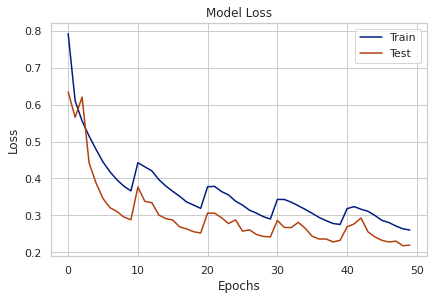

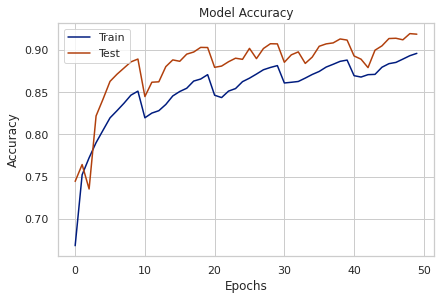

#### - As can be seen from the above two plots, that the training and validation set loss decrease gradually, while the training and validation set accuracies increase gradually over the 50 epochs.
### Part 5) Evaluate your code with other metrics on the training data (by using some of it as test data) and argue for the benefit of you approach :-
#### - Well as discussed previously in section 2.1, the model's accuracy has been tested on a validation set ( which was 10% of the training data)
#### - Below are a few snapshots of the model training and evaluating over several different stages of the model:-

In [ ]:
# Training the model
history = model.fit_generator(datagen.flow(X_train, y_train_smooth, batch_size=batch_size, shuffle=True),epochs=epochs,steps_per_epoch=(len(y_train) - 1) // batch_size + 1,validation_data=(X_test, y_test),callbacks=[annealer])
# Evaluating the model
score = model.evaluate(X_test, y_test)
print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

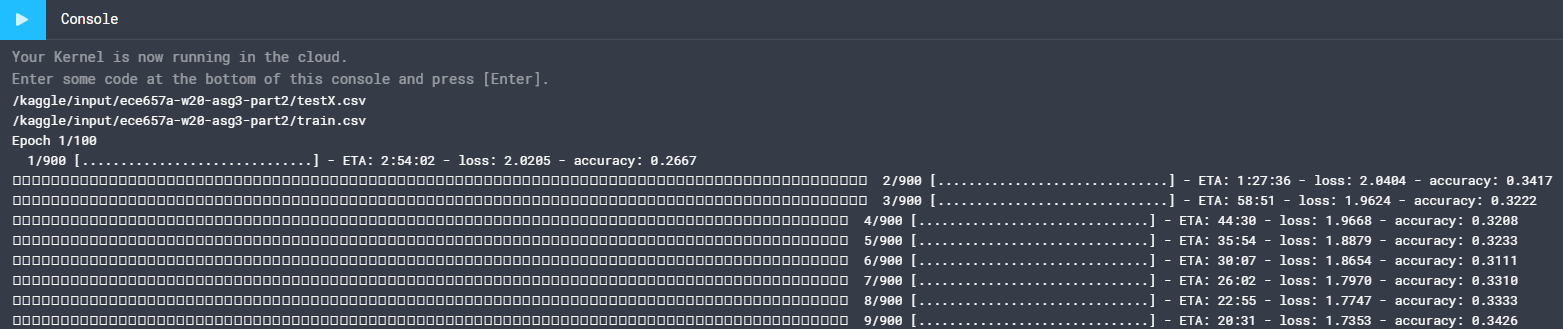

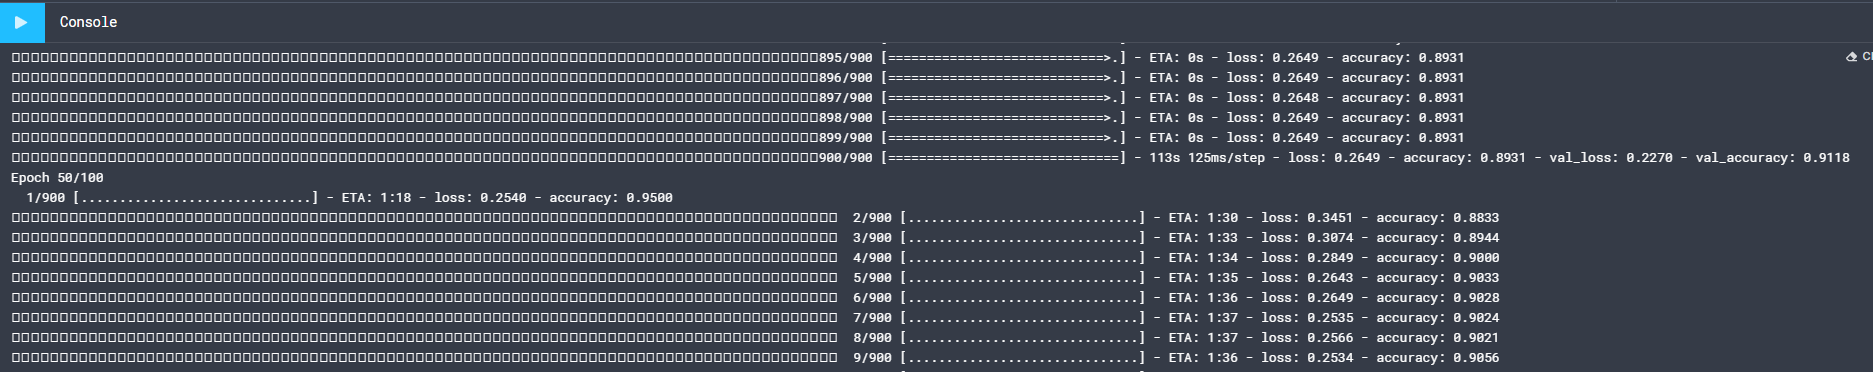

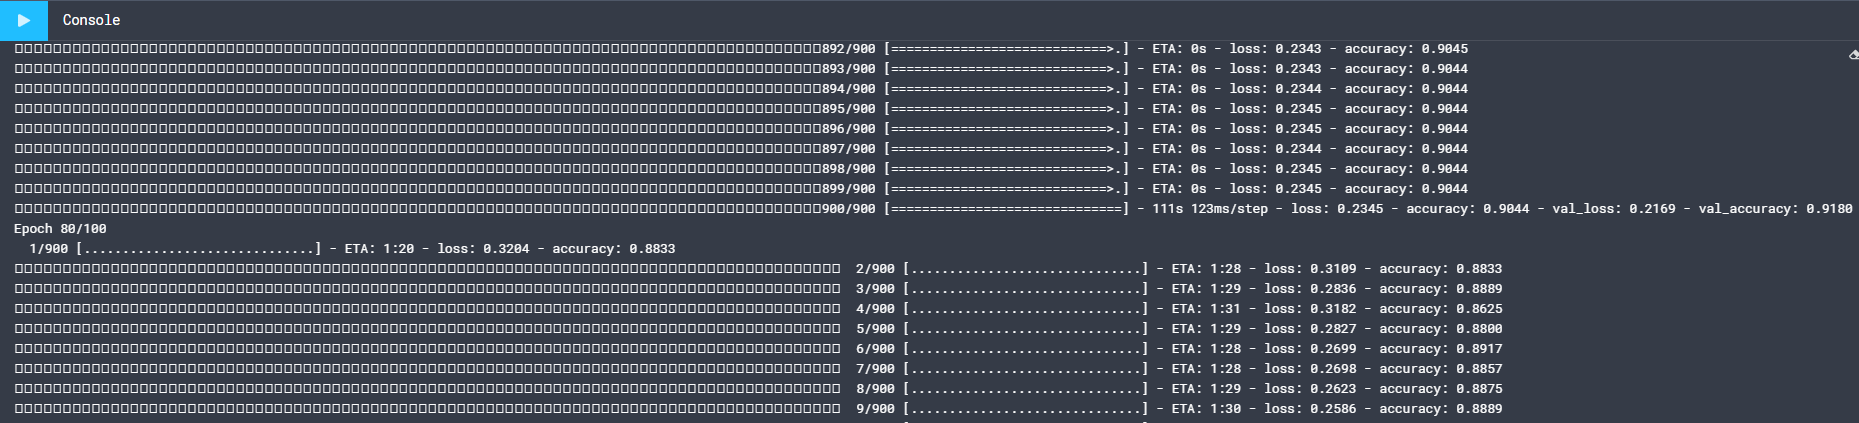

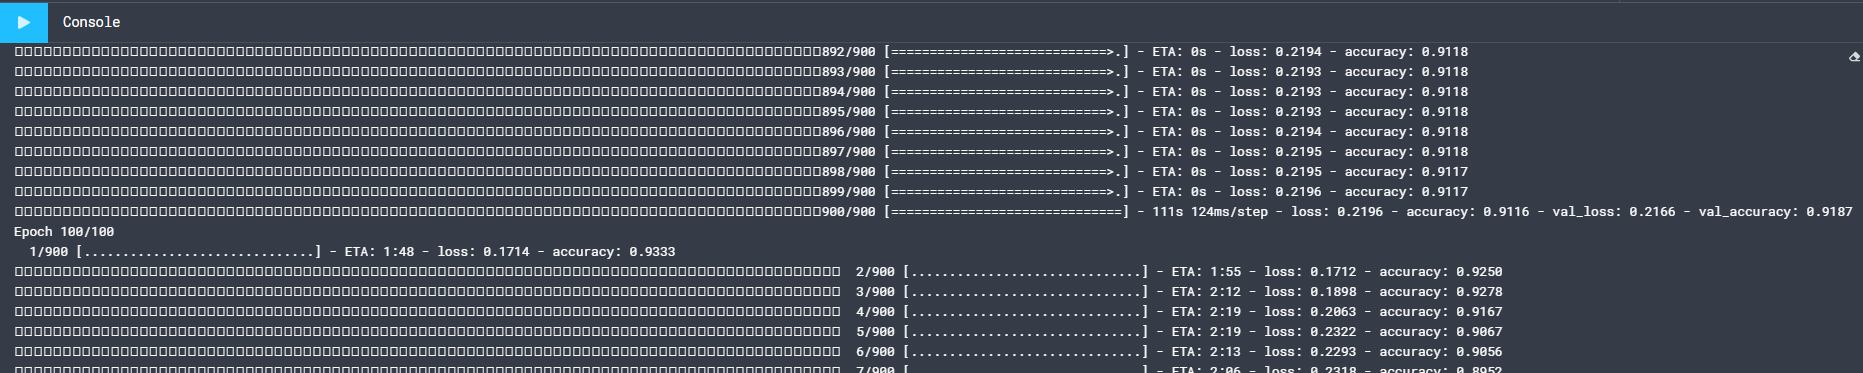

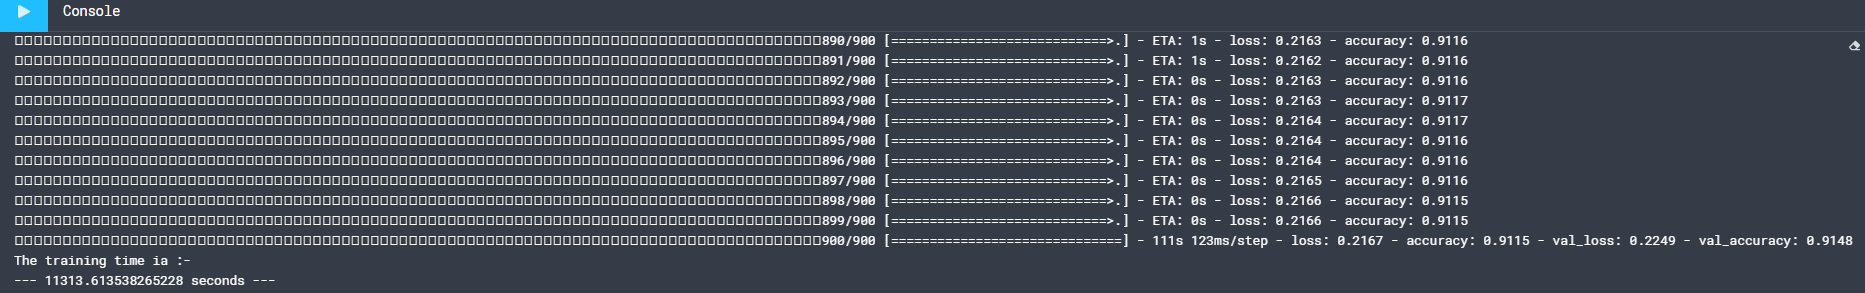

#### - As can be seen in the snapshots above, the Val_accuracy represents the testing of the trained model on validation set at the end of every epoch.
#### - The accuracy metric, provides a validation for improvent in the model's performance.
#### - As stated before in part3, this helps us identify how many epochs are really required to train the model. In this case, training the model over 50 epochs also suffices to get similar accuracy.